**COSC-4117EL Fall 2023**

This is the implementation of three search algorithms: Depth First Search (DFS), Breadth First Search (BFS), and Uniform Cost Search (UCS) on a directed graph.

Update: A* Search is added.

Import libraries

matplotlib: https://matplotlib.org/

networkx: https://networkx.org/documentation/stable/tutorial.html

queue: https://docs.python.org/3.10/library/queue.html


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import queue

Define the directed graph:
Graph class is implemented with the ability to add edges with associated costs.

add_edge: Adds an edge to the graph with an associated cost. If the start node does not exist in the graph, it initializes it.

get_neighbors: Returns neighbors (and associated costs) of a given node.

In [ ]:
class Graph:
    def __init__(self):
        # Dictionary to store nodes and their neighbors
        self.nodes = {}

    def add_edge(self, start, end, cost=1):
        """Add an edge to the graph from 'start' to 'end' with a given 'cost'."""

        # If the starting node is not already in the graph, add it
        if start not in self.nodes:
            self.nodes[start] = {}

        # Add the ending node as a neighbor to the starting node with the given cost
        self.nodes[start][end] = cost

    def get_neighbors(self, node):
        """Return the neighbors of the given 'node'."""
        return self.nodes.get(node, {})

Implement the search algorithms

dfs: Depth First Search is implemented using a stack. It searches deeper into the graph before backtracking.

bfs: Breadth First Search is implemented using a queue. It searches all neighbors at the present depth before moving on to nodes at the next depth level.

ucs: Uniform Cost Search is implemented using a priority queue. It always selects the node with the lowest cost to expand next.

In [ ]:
def dfs(graph, start, goal):
    """Depth First Search implementation."""
    # Initialize the stack with the starting node, path and cost
    stack = queue.LifoQueue()
    stack.put((start, [start], 0))
    visited = set()
    while not stack.empty():
        vertex, path, cost = stack.get()
        visited.add(vertex)
        # Sort neighbors in descending order for LIFO processing
        sorted_neighbors = sorted(graph.get_neighbors(vertex).items(), key=lambda x: x[0], reverse=True)

        for next_node, next_cost in sorted_neighbors:
            if next_node in path:
                continue
            elif next_node == goal:
                # If the goal node is found, return the path and cost
                return path + [next_node], cost + next_cost, len(visited)
            else:
                stack.put((next_node, path + [next_node], cost + next_cost))
    # If no path is found, return None for both path and cost
    return None, None

def bfs(graph, start, goal):
    """Breadth First Search implementation."""
    # Initialize the queue with the starting node, path and cost
    q = queue.Queue()
    q.put((start, [start], 0))
    visited = set()

    while not q.empty():
        vertex, path, cost = q.get()
        # Sort neighbors in ascending order for FIFO processing
        sorted_neighbors = sorted(graph.get_neighbors(vertex).items(), key=lambda x: x[0])
        visited.add(vertex)
        for next_node, next_cost in sorted_neighbors:
            if next_node in path:
                continue
            elif next_node == goal:
                # If the goal node is found, return the path and cost
                return path + [next_node], cost + next_cost, len(visited)
            else:
                q.put((next_node, path + [next_node], cost + next_cost))
    # If no path is found, return None for both path and cost
    return None, None

def ucs(graph, start, goal):
    """Uniform Cost Search implementation."""
    # Initialize the priority queue with the starting node and cost
    pq = queue.PriorityQueue()
    pq.put((0, start, [start]))

    # Set to keep track of visited nodes
    visited = set()

    while not pq.empty():
        cost, vertex, path = pq.get()

        # If the node has been visited before, skip processing
        if vertex in visited:
            continue
        if vertex == goal:
            # If the goal node is found, return the path and cost
            return path, cost, len(visited)

        visited.add(vertex)

        # For each neighbor of the current node, calculate total cost and add to the queue
        for next_node, next_cost in graph.get_neighbors(vertex).items():
            if next_node not in visited:
                pq.put((cost + next_cost, next_node, path + [next_node]))

    # If no path is found, return None
    return None

In [ ]:
def heuristic(node, goal):
    """
    Simple heuristic based on node names.
    Computes the absolute difference between the ASCII values of the node and goal characters.
    This heuristic assumes that the node and goal are single characters.
    Example: |S-G| = 12, |A-G| = 6, |C-G| = 4
    """
    return abs(ord(node) - ord(goal))

def a_star_search(graph, start, goal):
    """
    A* search algorithm for finding the shortest path in a graph.
    """

    # Initialize the priority queue (estimated cost, actual path cost so far, current node, path from start to current node).
    pq = queue.PriorityQueue()
    pq.put((0 + heuristic(start, goal), 0, start, [start]))  # start node with its estimated cost based on heuristic
    # See the queue structure
    print(list(pq.queue))
    # Set to keep track of visited nodes to prevent revisiting them.
    visited = set()

    while not pq.empty():
        # Get the node with the smallest estimated cost from the priority queue.
        estimated_cost, path_cost, vertex, path = pq.get()
        # Just to observe the added node
        print(estimated_cost, path_cost, vertex, path)
        # If the current node has been visited before, skip it.
        if vertex in visited:
            continue

        # If the current node is the goal, return the path, the actual path cost and the number of nodes visited.
        if vertex == goal:
            return path, path_cost, len(visited)

        # Mark the current node as visited.
        visited.add(vertex)

        # Explore neighboring nodes.
        for next_node, edge_cost in graph.get_neighbors(vertex).items():
            if next_node not in visited:
                # Calculate the new actual path cost from start to the neighboring node.
                new_path_cost = path_cost + edge_cost # g(n)
                # f(n) Calculate the estimated cost for the neighboring node using the heuristic.
                estimated_cost = new_path_cost + heuristic(next_node, goal) # h(n)
                # Add the neighboring node to the priority queue.
                pq.put((estimated_cost, new_path_cost, next_node, path + [next_node]))

    # If no path is found, return None
    return None


Visualize the graph

visualize_graph: Uses NetworkX and Matplotlib to visualize the given graph. Nodes are represented as circles labeled with their names, and edges show the associated costs.
Test and display results:

In [ ]:
def visualize_graph(graph):
    """Visualizes the graph using networkx and matplotlib."""

    G = nx.DiGraph() # Create a directed graph

    # Add edges and their weights to the networkx graph
    for node, neighbors in graph.nodes.items():
        for neighbor, cost in neighbors.items():
            G.add_edge(node, neighbor, weight=cost)

    # Plot settings
    plt.figure(figsize=(3, 3))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", node_shape="o", alpha=0.6, linewidths=4)

    # Display edge weights
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()


A graph is created and edges are added.
The graph is visualized.
All three search algorithms are run on the graph to find a path from node 'S' to node 'G' and the results are printed.
When you run the code, it should display a visual representation of the graph and the paths (and costs) found by each of the search algorithms.


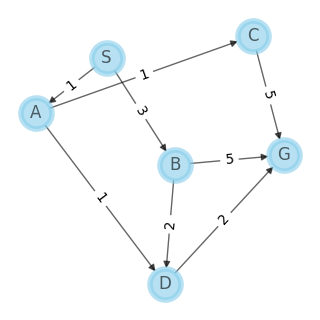

DFS path: ['S', 'A', 'C', 'G'], cost: 7, visited nodes: 3
BFS path: ['S', 'B', 'G'], cost: 8, visited nodes: 3
UCS path: ['S', 'A', 'D', 'G'], cost: 4, visited nodes: 5
[(12, 0, 'S', ['S'])]
12 0 S ['S']
7 1 A ['S', 'A']
5 2 D ['S', 'A', 'D']
4 4 G ['S', 'A', 'D', 'G']
A* search path: ['S', 'A', 'D', 'G'], cost: 4, visited nodes: 3


In [ ]:
graph = Graph()
# Add the edges from left to right
graph.add_edge('S', 'A', 1)
graph.add_edge('S', 'B', 3)
graph.add_edge('A', 'C', 1)
graph.add_edge('A', 'D', 1)
graph.add_edge('C', 'G', 5)
graph.add_edge('D', 'G', 2)
graph.add_edge('B', 'D', 2)
graph.add_edge('B', 'G', 5)

# Visualize the graph
visualize_graph(graph)

# Test DFS and print result
path, cost, visited_nodes = dfs(graph, 'S', 'G')
print(f"DFS path: {path}, cost: {cost}, visited nodes: {visited_nodes}")
# Test BFS and print result
path, cost, visited_nodes = bfs(graph, 'S', 'G')
print(f"BFS path: {path}, cost: {cost}, visited nodes: {visited_nodes}")
# Test UCS and print result
path, cost, visited_nodes = ucs(graph, 'S', 'G')
print(f"UCS path: {path}, cost: {cost}, visited nodes: {visited_nodes}")
# Test A* and print result
path, cost, visited_nodes = a_star_search(graph, 'S', 'G')
print(f"A* search path: {path}, cost: {cost}, visited nodes: {visited_nodes}")